### High-Pass FIR Filter

Next example: [/examples/lti_filters/fir/band-pass.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/fir/band-pass.ipynb)

In [1]:
import sys
sys.path.insert(0, '../../../') # To be able to reach functions
from functions import fft, lti
from scipy import signal

In [2]:
num_of_coeffs = 81 # Number of coefficients, i.e. the filter order + 1
cutoff_freqs = [.5]
numerator_coeffs = signal.firwin(num_of_coeffs, cutoff_freqs, pass_zero=False) # FIR (LPF by default)
lti.equation(numerator_coeffs)

<IPython.core.display.Latex object>

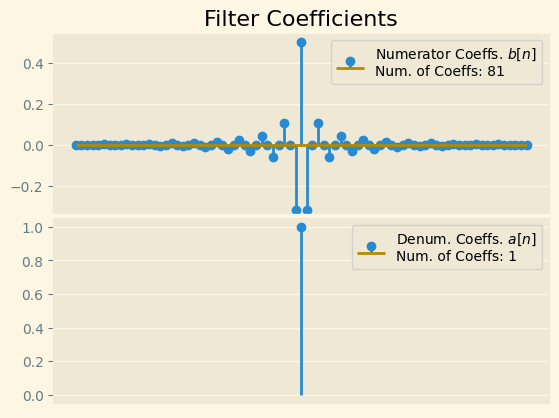

/opt/miniconda3/envs/study/lib/python3.10/site-packages/scipy/signal/_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


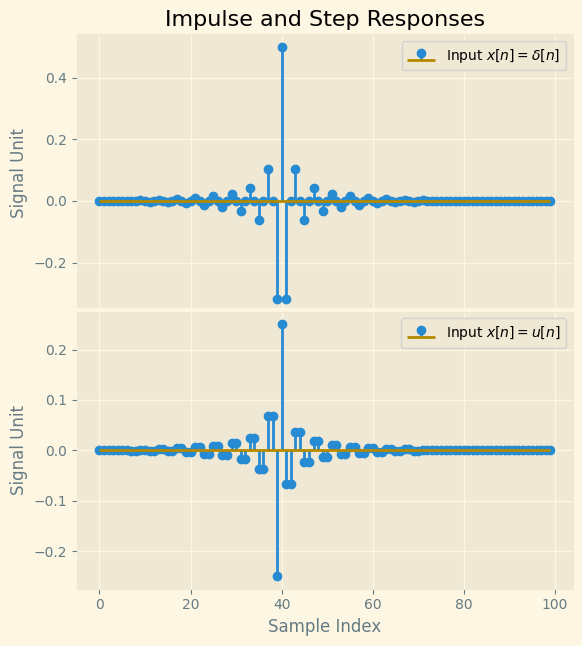

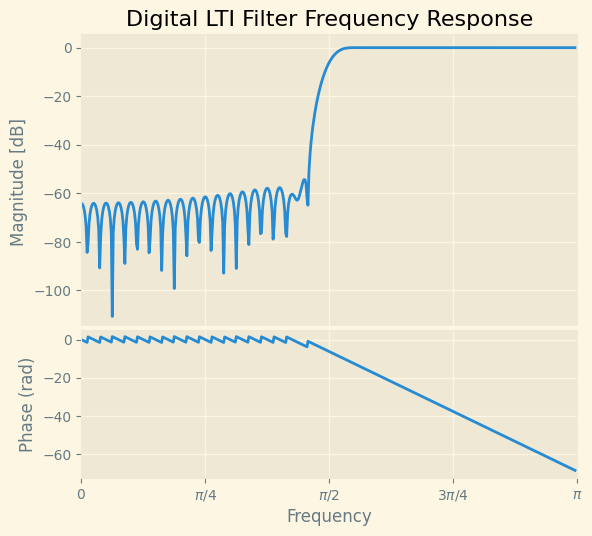

In [3]:
lti.plot_filter_coefficients(numerator_coeffs)
lti.plot_impulse_and_step_responses(numerator_coeffs)
lti.bode(numerator_coeffs)

In [4]:
first_time = 0 # s
last_time = 3 # s
samp_freq = 100 # Hz

time = fft.get_time(first_time, last_time, samp_freq)

zero_freq = 0 # Hz
low_freq = 12 # Hz
cutoff_freq = 25 # Hz
high_freq = 38 # Hz
very_high_freq = 49.5 # Hz

common_amplitude = 1
common_phase = 0 # rad
common_offset = 0

signal_zero_freq = fft.get_signal(zero_freq, 0, common_phase, common_amplitude, time)
signal_low_freq = fft.get_signal(low_freq, common_amplitude, common_phase, common_offset, time)
signal_cutoff_freq = fft.get_signal(cutoff_freq, common_amplitude, common_phase, common_offset, time)
signal_high_freq = fft.get_signal(high_freq, common_amplitude, common_phase, common_offset, time)
signal_very_high_freq = fft.get_signal(very_high_freq, common_amplitude, common_phase, common_offset, time)

superposition_signal = signal_zero_freq + signal_low_freq + signal_cutoff_freq + signal_high_freq + signal_very_high_freq

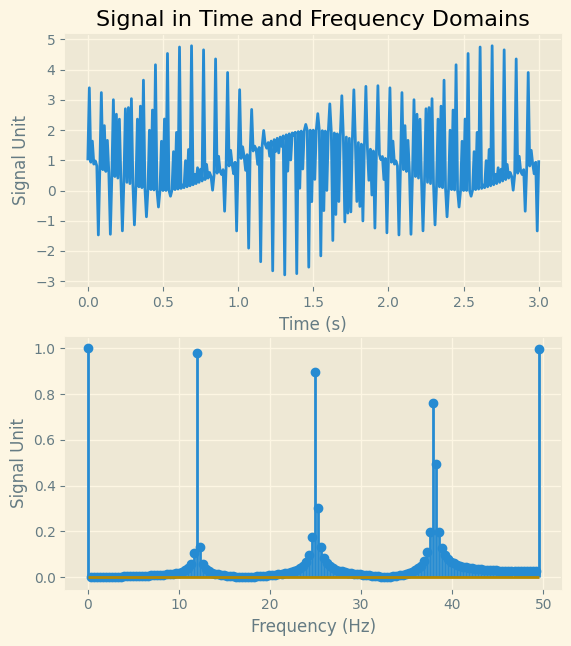

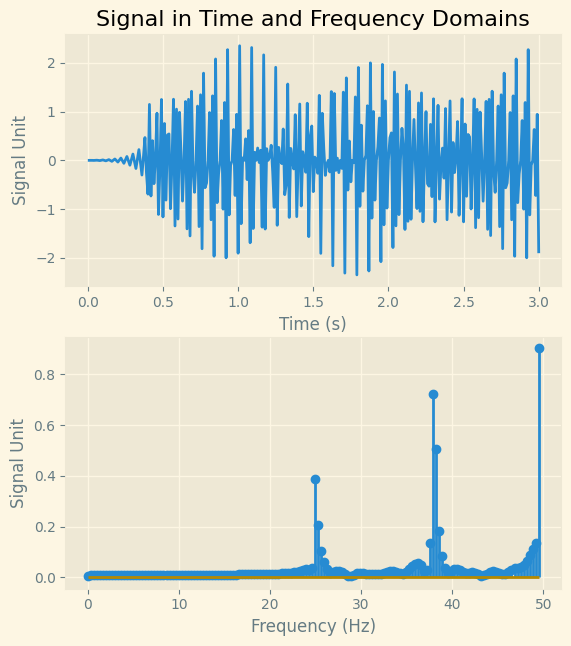

In [5]:
fft.plot_signal_and_fft(time, superposition_signal, samp_freq)
filtered_signal = signal.lfilter(numerator_coeffs, [1], superposition_signal)
fft.plot_signal_and_fft(time, filtered_signal, samp_freq)

Next example: [/examples/lti_filters/fir/band-pass.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/fir/band-pass.ipynb)